# Project Goal 
> To predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly.

# Project Description
> In the "Dimensional Travel Prediction for Spaceship Titanic" competition, participants are tasked with creating predictive models to determine whether a passenger was transported to an alternate dimension during the catastrophic collision of the Spaceship Titanic with a spacetime anomaly. The competition provides participants with a dataset containing personal records recovered from the ship's damaged computer system.

# Initial Hypotheses
> I believe that a passengers VIP status with be the most highly weighted towards Transported.

# Imports

In [1]:
import wrangle
import pandas as pd
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

# Acquire
> * Data acquired from: https://www.kaggle.com/competitions/spaceship-titanic/data

In [2]:
# Import File
df = pd.read_csv('train.csv')

# Prepare
> * filled nulls with mean in all float64 columns

> * dropped Cabin column because there were too many unique strings

> * dropped nulls in RoomService becuse it was 181 rows
> * dropped nulls in vip because it was only 203 samples
> * dropped nulls in Destination because it was only 182 samples
> * dropped nulls in CryoSleep because it was only 217 samples

> * dropped nulls because it only accounted for 201 out of 8693 rows.
> * dropped the name column because we have passenger id

> * converted converted the boolean values of 'VIP', 'CryoSleep', 'Transported' to 0 or 1

> * encoded homeplannet because it was catagorical then dropped homeplannet column
> * encoded destination 

In [3]:
# Prepared the data
df = wrangle.prepare_data(df)

In [4]:
# A brief look at the data
df.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1
1,0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1,0,0,0,0,1
2,0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,0,0,1
3,0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,0,0,1
4,0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,0,0,0,0,1


In [5]:
# Scaled my data
df = wrangle.scale_data(df)

In [6]:
# Splitting my data
X_train, X_test, y_train, y_test = wrangle.split_data(df)

# Univariate Analysis
> For the First iteration I decided to not get rid of outliers an use a robust scaler

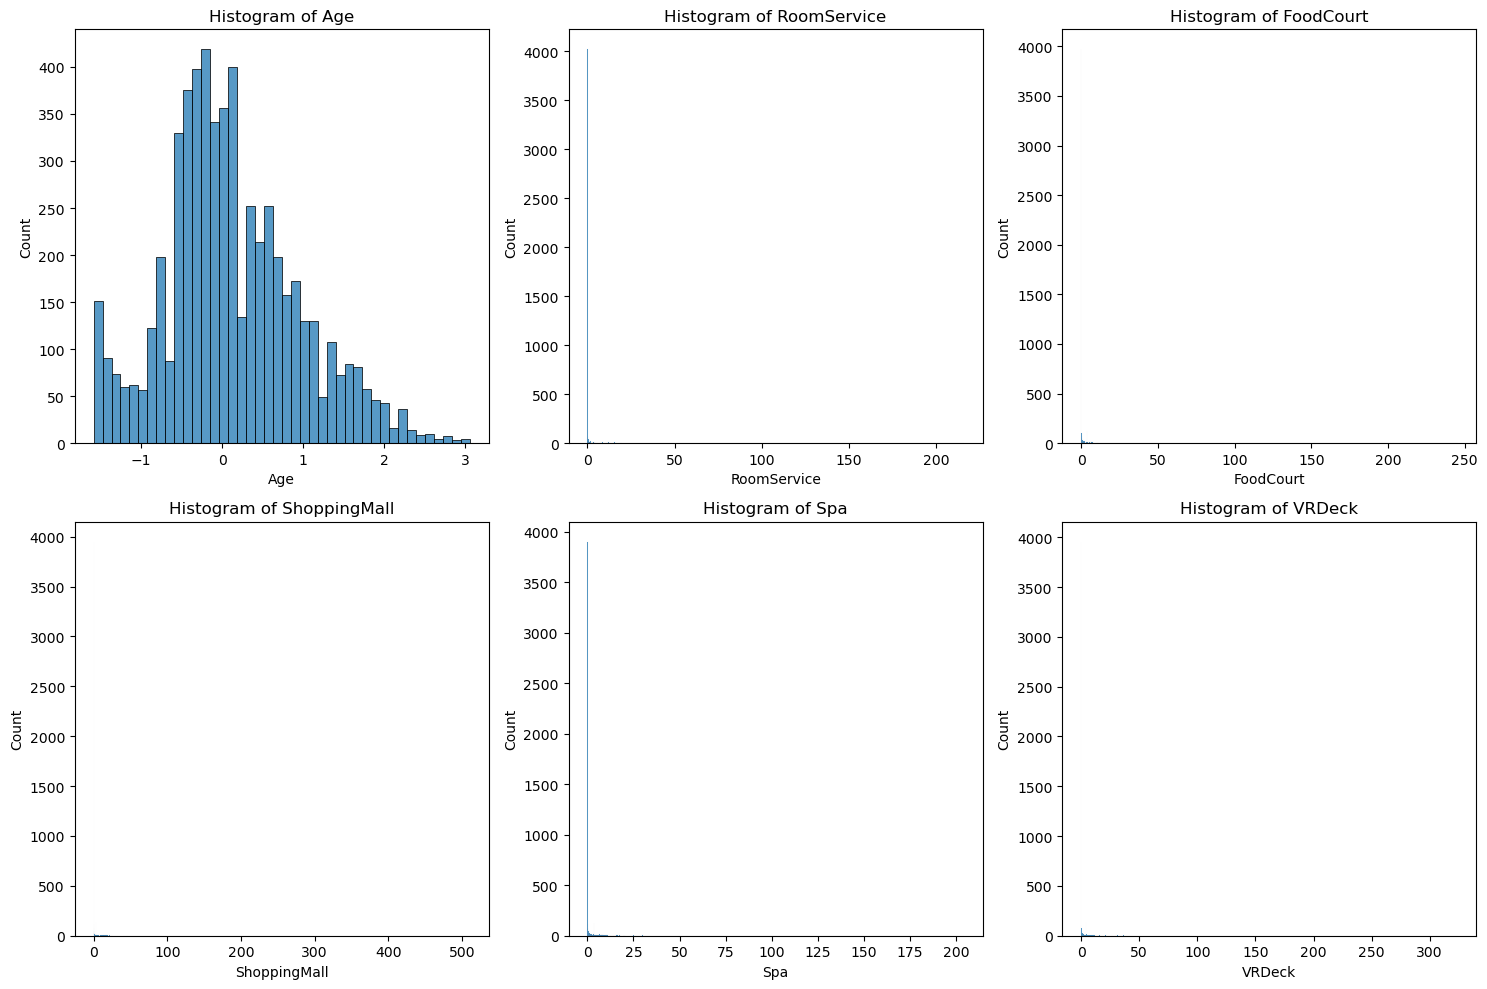

In [7]:
# Shows histplots of my data
wrangle.new_visual_univariate_findings(X_train)

# Bivariate Exploration

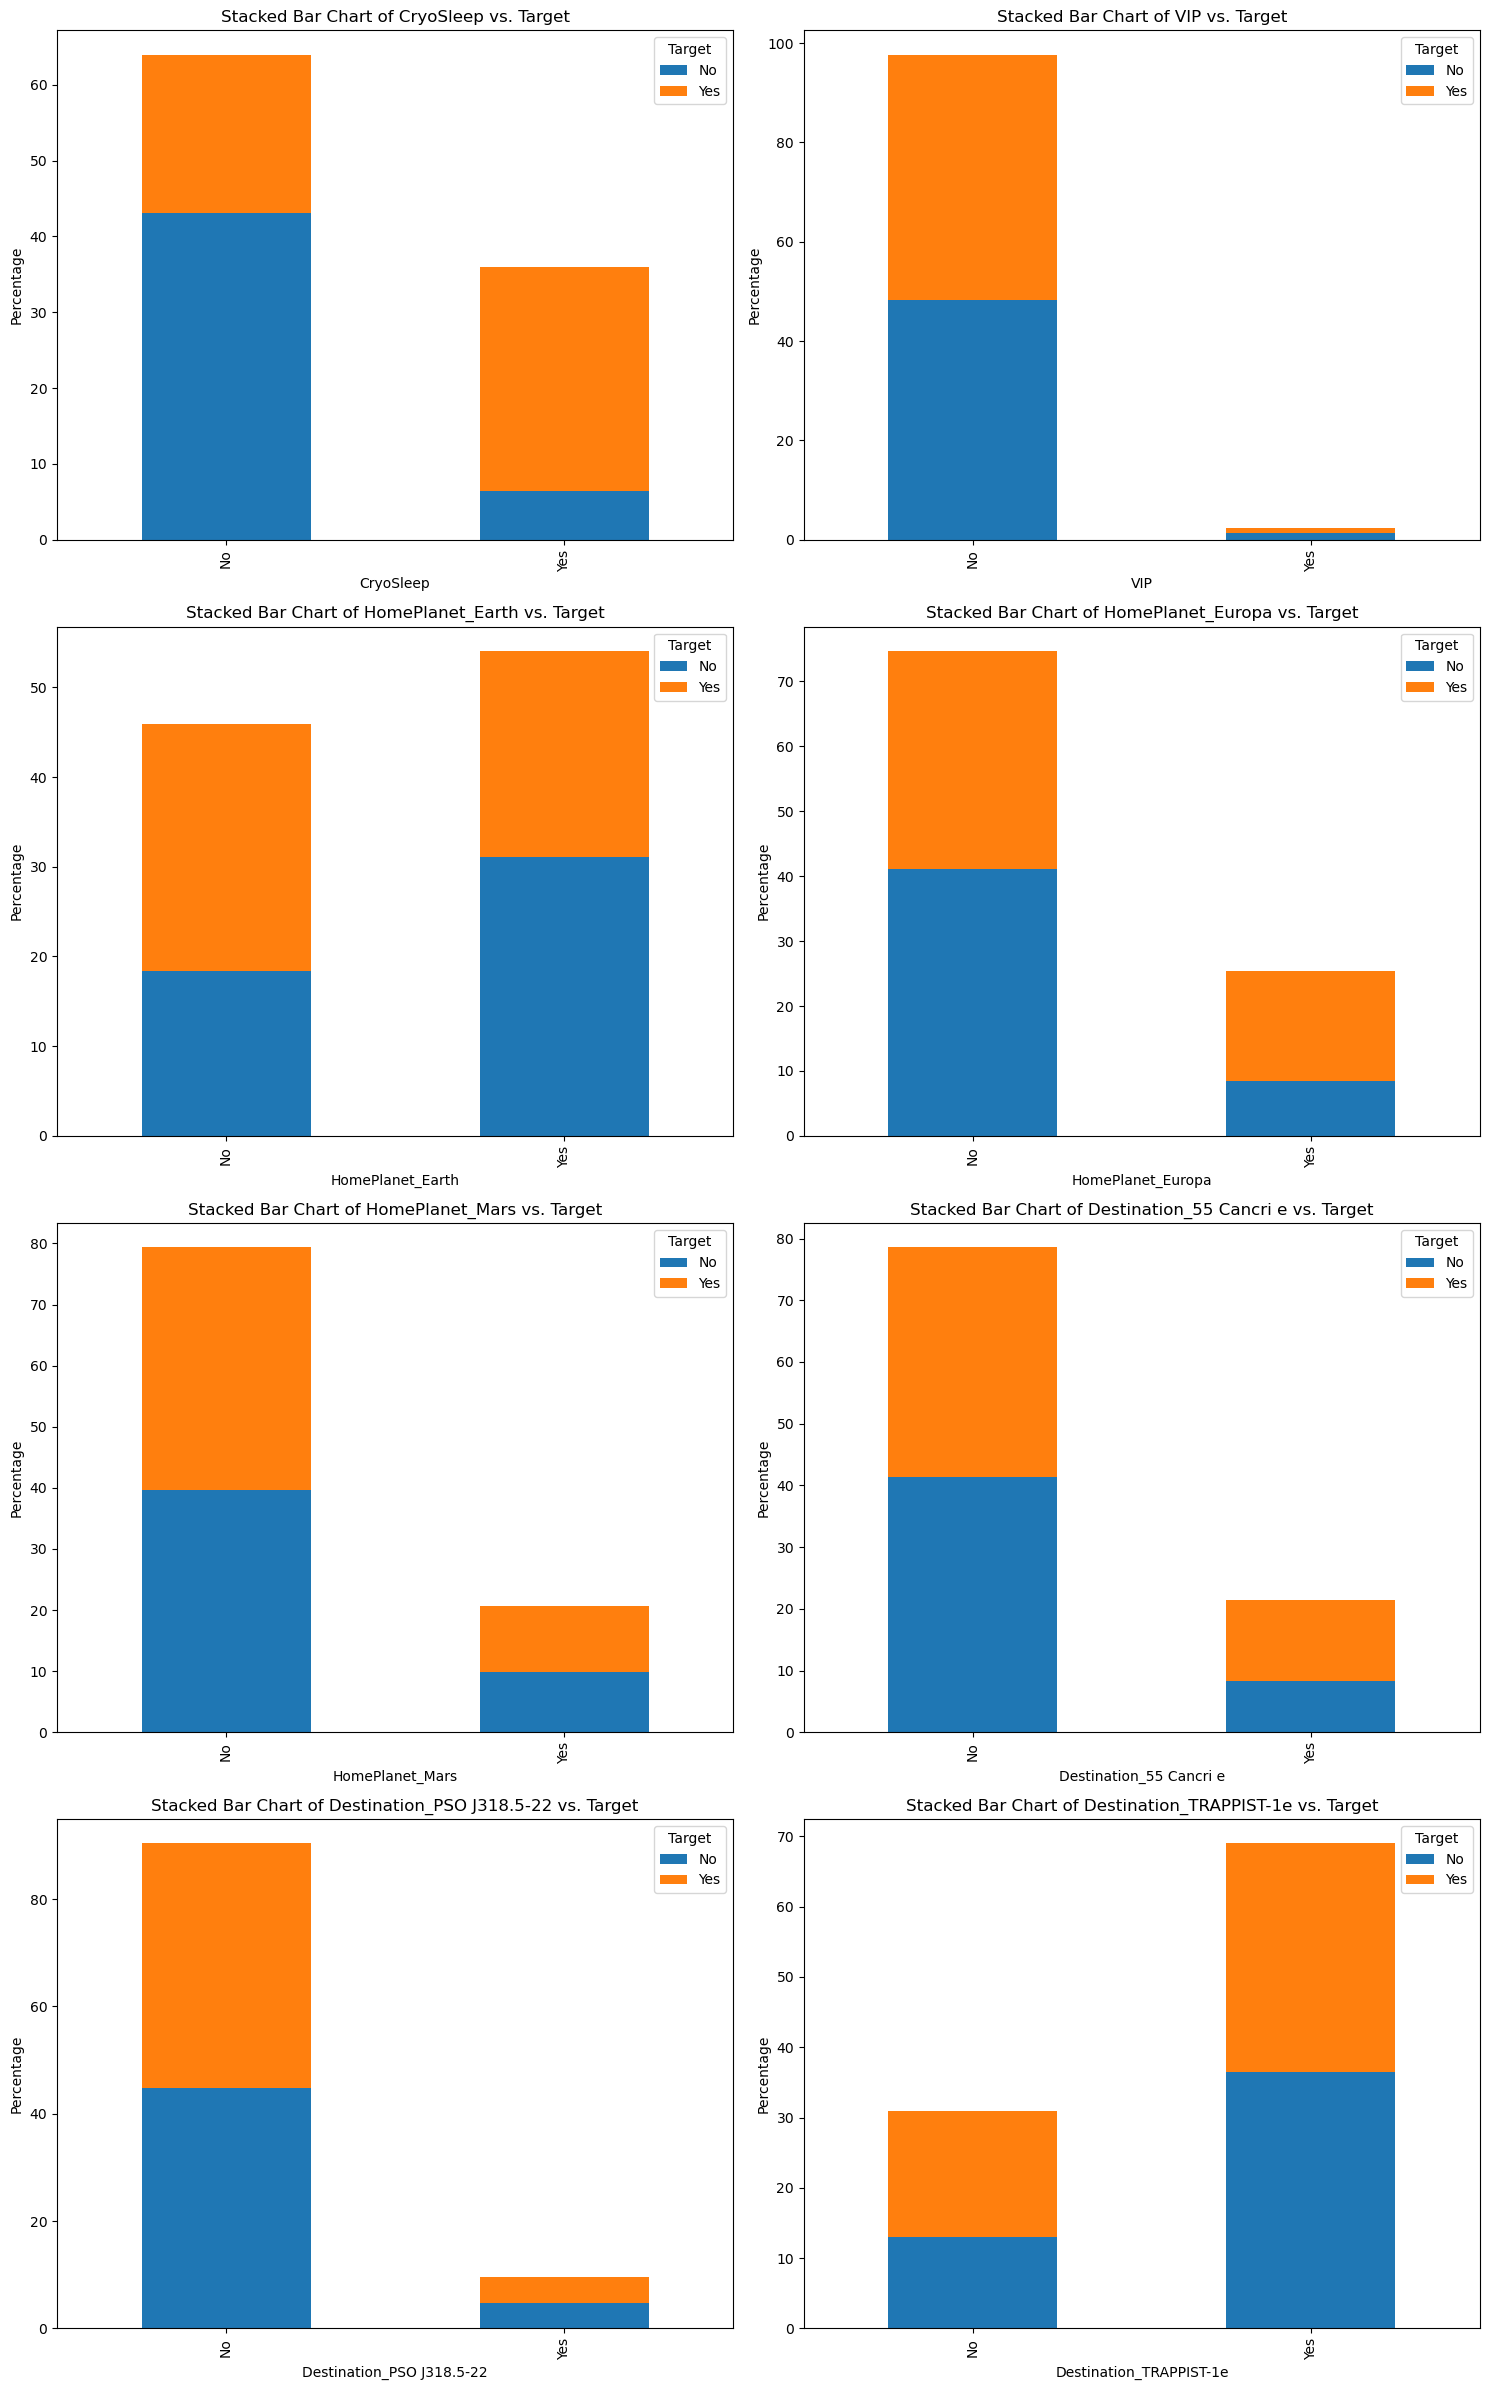

In [9]:
wrangle.percentages_visuals(X_train, y_train)

# Stats tests
> ## Comparison of means

### $H_0$: 
> * Mean of Different catagories of people who have went through the alternate dimension = 
> * Mean of Different catagories of people who have not went through the alternate dimension

### $H_\alpha$: 
> * Mean of Different catagories of people who have went through the alternate dimension != 
> * Mean of Different catagories of people who have not went through the alternate dimension

In [10]:
means_df = wrangle.comparison_of_means(df)
means_df

,t_statistic,p_value,col,Moving Forward
0,6.664133,2.844689e-11,Age,Yes
1,22.187227,8.557207e-106,RoomService,Yes
2,-4.205010,2.640096e-05,FoodCourt,Yes
3,-1.061209,2.886281e-01,ShoppingMall,No
4,19.600545,1.578404e-83,Spa,Yes
5,18.471253,1.384061e-74,VRDeck,Yes


## Chi2 Tests

### $H_0$: 
> * There is no significant association or relationship between the people who were transported and the various catagorical columns


### $H_\alpha$: 
> * There is a significant association or relationship between the people who were transported and the various catagorical columns

In [11]:
chi2_df = wrangle.chi2_test(X_train, y_train)
chi2_df

,feature,chi2,p,degf,expected,Moving Forward
1,CryoSleep,1306.685014,3.985450e-286,1,"[[1841.7218588640276, 1876.2781411359724], [10...",Yes
2,VIP,4.868916,2.734467e-02,1,"[[2811.6227194492253, 2864.3772805507747], [66...",Yes
3,HomePlanet_Earth,176.194179,3.284231e-40,1,"[[1322.096729776248, 1346.903270223752], [1555...",Yes
4,HomePlanet_Europa,201.280127,1.097700e-45,1,"[[2148.8406196213427, 2189.1593803786573], [72...",Yes
5,HomePlanet_Mars,1.207499,2.718279e-01,1,"[[2285.0626506024096, 2327.9373493975904], [59...",No
6,Destination_55 Cancri e,76.025653,2.800034e-18,1,"[[2262.7717728055077, 2305.2282271944923], [61...",Yes
7,Destination_PSO J318.5-22,0.000076,9.930591e-01,1,"[[2601.0977624784855, 2649.9022375215145], [27...",No
8,Destination_TRAPPIST-1e,59.653307,1.131290e-14,1,"[[892.1304647160069, 908.8695352839931], [1985...",Yes


In [12]:
means_list = means_df.col[means_df['Moving Forward'] == 'Yes'].tolist()
chi2_list = chi2_df.feature[chi2_df['Moving Forward'] == 'Yes'].tolist()
chi2_list

['CryoSleep',
 'VIP',
 'HomePlanet_Earth',
 'HomePlanet_Europa',
 'Destination_55 Cancri e',
 'Destination_TRAPPIST-1e']

# Exploratory summary
> * CryoSleep was the most statistically significant feature in the chi2 tests
> * Room service was the most statistically significant feature in the comparison of means tests

# Modeling
> - I will use my accuracy evaluation metric
> - People who have Transported make up 50 % of the data

** By guessing who has Transported one could achieve an accuracy of 50%<br>
** 50% will be the baseline accuracy I use for this project <br>
<br>
* I will be evaluating models developed using four different model types and various hyperparameter configurations<br>
* Models will be evaluated on train data<br>
* The model that performs the best will then be evaluated on test data

In [ ]:
wrangle.modeling(X_train, X_test, y_train, y_test, means_list, chi2_list)

In [ ]:
master_df

# Modeling Summary
> - My best model was
> - My unseen data performed at

# Conclusion

# Recommendations

# Next Steps